# Rede GRU
## Aumento de camadas e neurónios

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", header=None, sep="\s+")

X_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", header=None, sep="\s+")
y_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/Y_train.txt", header=None)

X_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", header=None, sep="\s+")
y_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

X_test = X_test_val[0:round(0.9*X_test_val.shape[0])]
X_val = X_test_val[round(0.9*X_test_val.shape[0]):]
y_test = y_test_val[0:round(0.9*y_test_val.shape[0])]
y_val = y_test_val[round(0.9*y_test_val.shape[0]):]

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
y_train = to_categorical(y_train)

X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

labels.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6, 2), (7352, 1, 561), (7352, 7), (2652, 1, 561), (2652, 7))

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GRU, BatchNormalization, Dense, LSTM, MaxPooling1D
import keras

modelo = Sequential()
modelo.add(GRU(128, return_sequences=True))
modelo.add(GRU(64))
modelo.add(BatchNormalization())
modelo.add(Dense(7, activation="softmax"))

modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy", 'Precision', 'Recall'])

In [3]:
historico = modelo.fit(X_train, y_train, batch_size=10, epochs=20, validation_data=(X_val, y_val))
modelo.save("ModeloGruLSTM-Changed.keras")

Epoch 1/20
736/736 [==============================] - 13s 7ms/step - loss: 0.1648 - accuracy: 0.9124 - precision: 0.9344 - recall: 0.8852 - val_loss: 0.1311 - val_accuracy: 0.9085 - val_precision: 0.9113 - val_recall: 0.9051
Epoch 2/20
736/736 [==============================] - 4s 6ms/step - loss: 0.0466 - accuracy: 0.9527 - precision: 0.9551 - recall: 0.9501 - val_loss: 0.3641 - val_accuracy: 0.6136 - val_precision: 0.6143 - val_recall: 0.6102
Epoch 3/20
736/736 [==============================] - 4s 5ms/step - loss: 0.0399 - accuracy: 0.9574 - precision: 0.9584 - recall: 0.9566 - val_loss: 0.2332 - val_accuracy: 0.7864 - val_precision: 0.7857 - val_recall: 0.7831
Epoch 4/20
736/736 [==============================] - 4s 5ms/step - loss: 0.0353 - accuracy: 0.9614 - precision: 0.9621 - recall: 0.9608 - val_loss: 0.1258 - val_accuracy: 0.9017 - val_precision: 0.9017 - val_recall: 0.9017
Epoch 5/20
736/736 [==============================] - 4s 5ms/step - loss: 0.0325 - accuracy: 0.9644 - p

In [5]:
_, precisao, precision, recall = modelo.evaluate(X_test, y_test)
f1_score = (2 * precision * recall) / (precision + recall)
print(f"Precisão do modelo: {precisao*100} %")
print(f"Precision do modelo: {precision*100} %")
print(f"Recall do modelo: {recall*100} %")
print(f"F1-Score do modelo: {f1_score*100} %")

83/83 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9385 - precision: 0.9385 - recall: 0.9385
Precisão do modelo: 93.85369420051575 %
Precision do modelo: 93.85369420051575 %
Recall do modelo: 93.85369420051575 %
F1-Score do modelo: 93.85369420051575 %


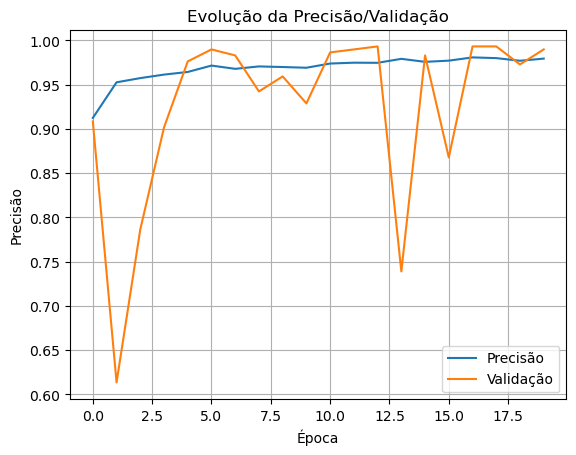

In [6]:
import matplotlib.pyplot as plt
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

accuracy = historico.history["accuracy"]
val_accuracy = historico.history["val_accuracy"]

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.title("Evolução da Precisão/Validação")
plt.xlabel("Época")
plt.ylabel("Precisão")
plt.legend(["Precisão", "Validação"])
plt.savefig("Evolução Precisão Validação GruLSTM-Changed", bbox_inches="tight")

83/83 [==============================] - 1s 3ms/step


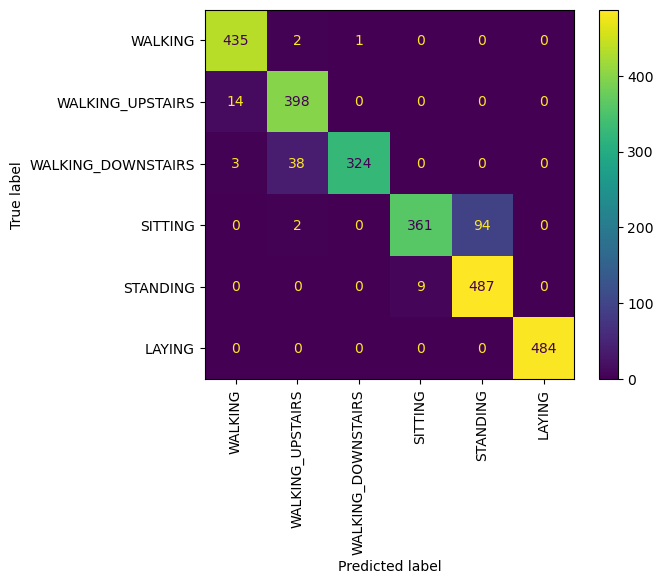

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.utils import to_categorical

y_previsto = modelo.predict(X_test)
y_previsto = np.argmax(y_previsto, axis=1)

y_test2 = np.argmax(y_test, axis=1)

y_previsto.shape, y_test2.shape

cm = confusion_matrix(y_test2, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])
display.plot(xticks_rotation="vertical")
display.figure_.savefig("Matriz de Confusão GruLSTM-Changed", bbox_inches="tight")